In [10]:
import pandas as pd
import numpy as np

In [11]:
df=pd.read_csv("C:/Users/Cyber/Desktop/projects ai/spam.csv",encoding="latin-1")

In [12]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4732,ham,Good Morning my Dear Shijutta........... Have ...,NaN,NaN,NaN
4014,spam,You will be receiving this week's Triple Echo ...,NaN,NaN,NaN
3012,spam,FREE UNLIMITED HARDCORE PORN direct 2 your mob...,NaN,NaN,NaN
3931,ham,Sos! Any amount i can get pls.,NaN,NaN,NaN
3124,spam,1st wk FREE! Gr8 tones str8 2 u each wk. Txt N...,NaN,NaN,NaN


In [13]:
df.shape

(5572, 5)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],inplace=True)

In [16]:
df.sample(5)

,v1,v2
3579,ham,Have a lovely night and when you wake up to se...
403,ham,None of that's happening til you get here though
3546,spam,Rock yr chik. Get 100's of filthy films &XXX p...
3616,ham,Sorry sent blank msg again. Yup but trying 2 d...
3596,spam,Congratulations YOU'VE Won. You're a Winner in...


In [17]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [18]:
df.sample(5)

,target,text
1757,ham,"Miss ya, need ya, want ya, love ya."
2997,ham,No b4 Thursday
1953,ham,Then just eat a shit and wait for ur monkey fa...
3218,ham,Me too baby! I promise to treat you well! I be...
1766,spam,SMS AUCTION You have won a Nokia 7250i. This i...


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [20]:
df['target']=encoder.fit_transform(df['target'])

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [23]:
df.duplicated().sum()

403

In [24]:
df=df.drop_duplicates(keep='first')

In [25]:
df.duplicated().sum()

0

In [26]:
df.shape

(5169, 2)

In [27]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

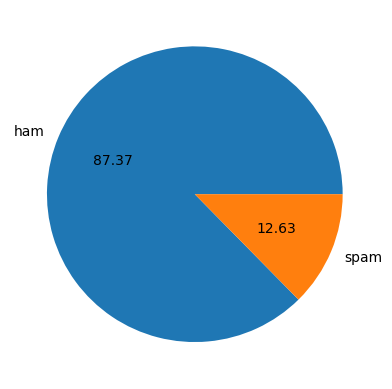

In [29]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [30]:
import nltk
!pip install nltk

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cyber\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
df["num_characters"]=df['text'].apply(len)

In [33]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
df["num_words"]=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
df["sent_words"]=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
df.head()

,target,text,num_characters,num_words,sent_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
df[['num_characters','num_words','sent_words']].describe()

,num_characters,num_words,sent_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.547688,2.008319
std,58.236293,13.355192,1.478342
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,26.000000,3.000000
max,910.000000,220.000000,38.000000


In [38]:
df[df['target']==0][['num_characters','num_words','sent_words']].describe()

,num_characters,num_words,sent_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.224092,1.866918
std,56.358207,13.535100,1.420544
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
df[df['target']==1][['num_characters','num_words','sent_words']].describe()

,num_characters,num_words,sent_words
count,653.000000,653.000000,653.000000
mean,137.891271,27.701378,2.986217
std,30.137753,7.005779,1.500959
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [40]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

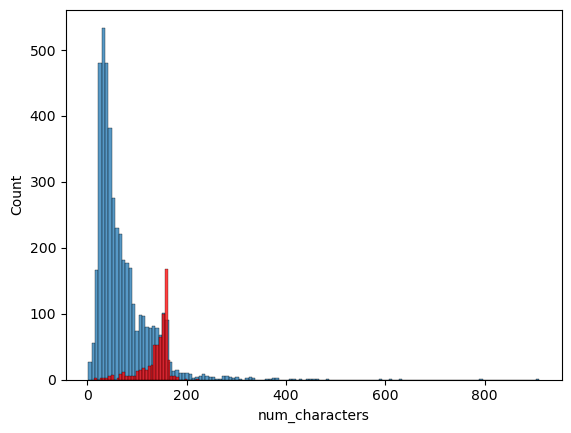

In [41]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

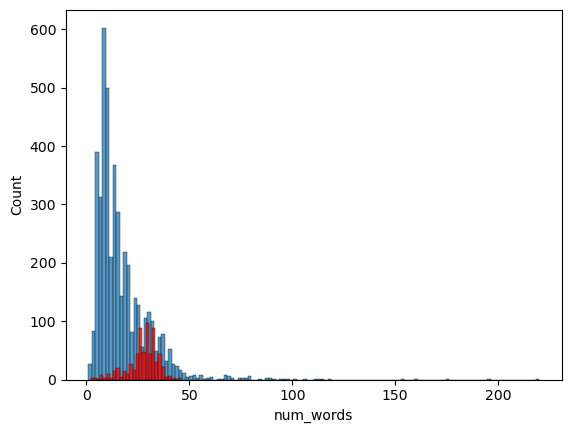

In [42]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

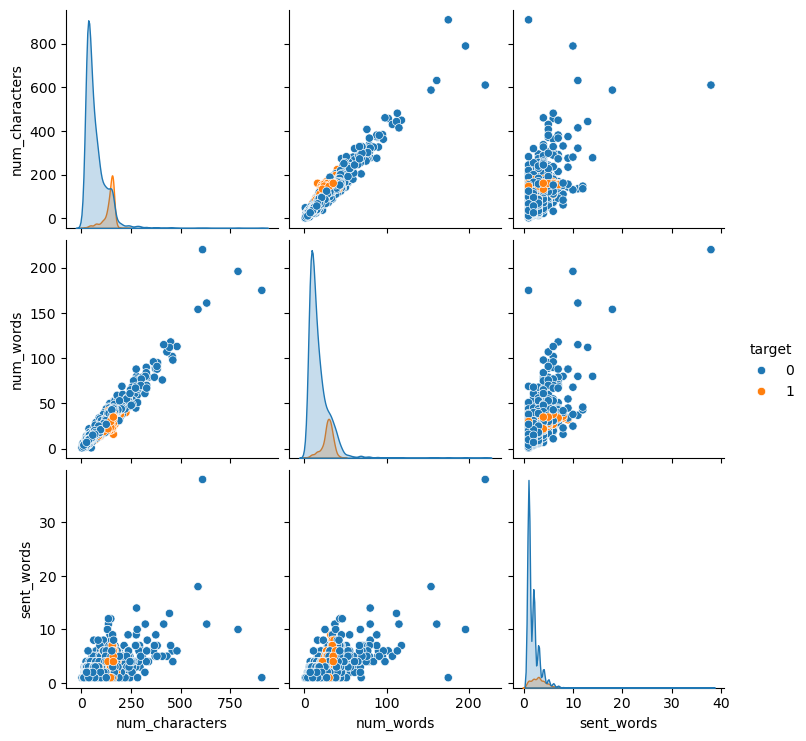

In [43]:
sns.pairplot(df,hue="target")

<Axes: >

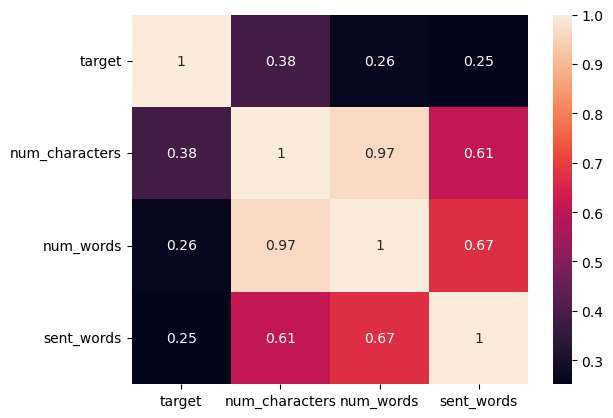

In [44]:
numeric_columns = df.select_dtypes(include='number')
numeric_columns.corr()
sns.heatmap(numeric_columns.corr(),annot=True)



In [45]:
df.head()

,target,text,num_characters,num_words,sent_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5169 non-null   int32 
 1   text            5169 non-null   object
 2   num_characters  5169 non-null   int64 
 3   num_words       5169 non-null   int64 
 4   sent_words      5169 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 222.1+ KB


In [47]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cyber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [50]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not  in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [51]:

df['transformed_text']=df['text'].apply(transform_text)

In [52]:
df.head()

,target,text,num_characters,num_words,sent_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
!pip install wordcloud
from wordcloud import WordCloud

In [54]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [55]:

spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

<Figure size 1500x600 with 0 Axes>

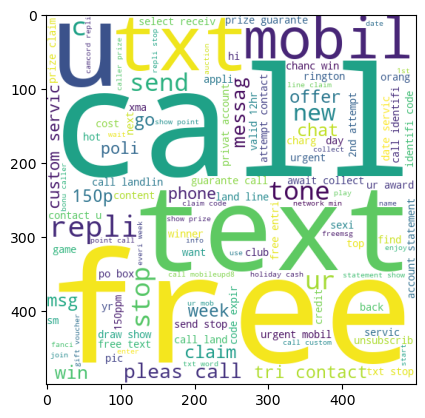

<Figure size 1500x600 with 0 Axes>

In [56]:
plt.imshow(spam_wc)
plt.figure(figsize=(15,6))

In [57]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

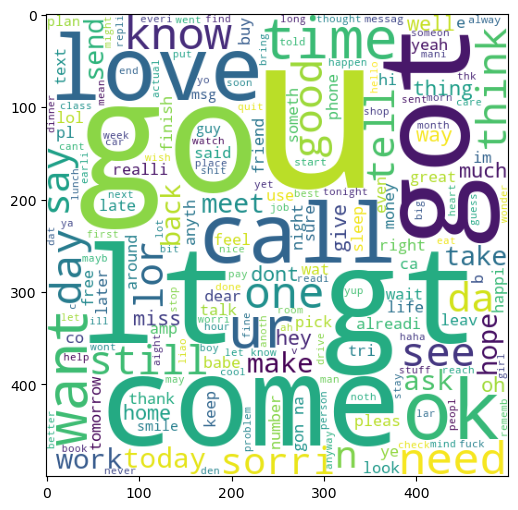

In [58]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [59]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [60]:
len(spam_corpus)

9945

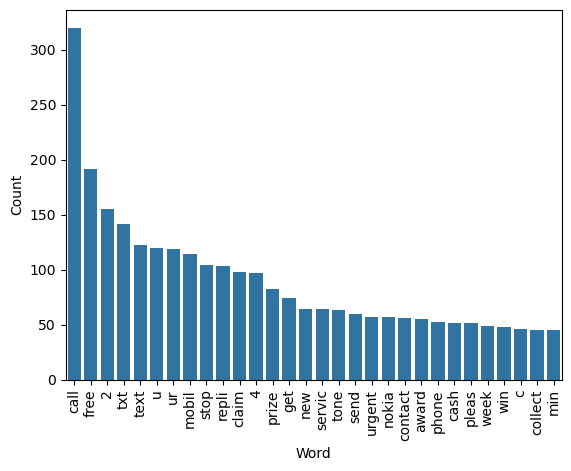

In [61]:
from collections import Counter
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=["Word", "Count"])
sns.barplot(x="Word", y="Count", data=common_words)
plt.xticks(rotation="vertical")
plt.show()

In [62]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


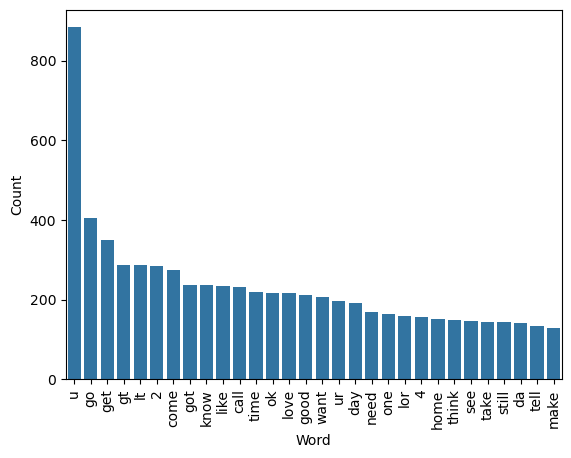

In [63]:
from collections import Counter
common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=["Word", "Count"])
sns.barplot(x="Word", y="Count", data=common_words)
plt.xticks(rotation="vertical")
plt.show()

In [208]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [288]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [284]:
#x=np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [304]:
x.shape

(5169, 3000)

In [306]:
y=df['target'].values

In [308]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [310]:
from sklearn.model_selection import train_test_split

In [312]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [314]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [316]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [318]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[787 109]
 [ 26 112]]
0.5067873303167421


In [320]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
mnb.fit(x_train,y_train)
y_pred1=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [322]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
bnb.fit(x_train,y_train)
y_pred1=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [330]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open('model.pkl','wb'))
